In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report

2022-05-26 23:23:20.562536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 23:23:20.562571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('data/thresh01.csv')
df = shuffle(df)
df.head()

,userMediaCount,medLikeNumbers,medCommentNumbers,medHashtagNumbers,medUploadIntervals,medUploadHours,countHasLocationInfo,followerCount,followingCount,hasExternalUrl,tagCounts,biographyLength,usernameLength,isFake
23,55,218.0,4.0,30.0,0.0,12.0,0,3278,2714,0,99,0,9,1
43,0,0.0,0.0,0.0,3.5,16.0,0,107,150,0,0,0,14,0
61,1000,11.0,0.0,2.0,1.0,8.0,679,5757,653,0,153,100,9,1
1384,99,33.0,0.0,2.0,9.0,7.0,34,414,434,0,12,0,10,0
85,77,58.0,2.0,0.0,10.5,17.0,13,366,555,0,18,30,10,0


In [3]:
X = df.drop('isFake', axis=1)
y = df['isFake'].values

In [4]:
scaler = MinMaxScaler()
X_numeric = X.drop(['hasExternalUrl'], axis=1)
X_numeric = scaler.fit_transform(X_numeric)
X = np.concatenate([X_numeric, X[['hasExternalUrl']]], axis=1)

In [5]:
one_hot_encoder = OneHotEncoder()
y = one_hot_encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
model = Sequential()
model.add(Dense(32, input_dim=len(df.columns) - 1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

2022-05-26 23:23:44.643600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-26 23:23:44.643621: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-26 23:23:44.643634: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fatemeh): /proc/driver/nvidia/version does not exist
2022-05-26 23:23:44.654873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
16/16 [==============================] - 2s 7ms/step - loss: 0.6812 - accuracy: 0.5803
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6081 - accuracy: 0.7318
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8403
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8741
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8813
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8854
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8782
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8843
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8874
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8833
Epoch 11/

16/16 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9314
Epoch 84/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.9284
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9365
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9365
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9284
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9284
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9304
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9232
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9253
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9314
Epoch 93/100


In [10]:
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

14/14 [==============================] - 1s 3ms/step


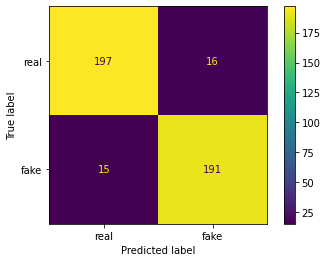

In [11]:
cm = confusion_matrix(test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['real', 'fake'])
cmd.plot()

In [12]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       213
           1       0.92      0.93      0.92       206

    accuracy                           0.93       419
   macro avg       0.93      0.93      0.93       419
weighted avg       0.93      0.93      0.93       419

